In [ ]:
from tensorflow import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[2]]

'Sneaker'

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
from tensorflow.keras.layers import Dense
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="adam",
metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4869 - accuracy: 0.8263 - val_loss: 0.3922 - val_accuracy: 0.8588
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3641 - accuracy: 0.8669 - val_loss: 0.3495 - val_accuracy: 0.8746
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3306 - accuracy: 0.8777 - val_loss: 0.3488 - val_accuracy: 0.8770
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3049 - accuracy: 0.8868 - val_loss: 0.3220 - val_accuracy: 0.8804
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2883 - accuracy: 0.8935 - val_loss: 0.3029 - val_accuracy: 0.8934
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2712 - accuracy: 0.8977 - val_loss: 0.3286 - val_accuracy: 0.8816
Epoch 7/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.2574 - accuracy: 0.9025 - val_loss: 0.3112 - val_accuracy

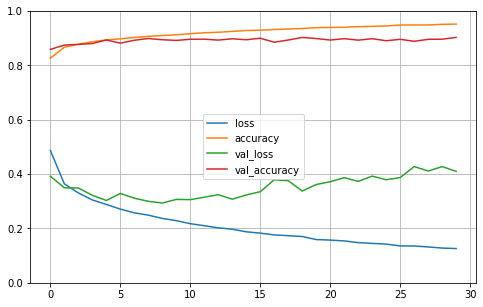

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 101.3886 - accuracy: 0.8693


[101.38864135742188, 0.8693000078201294]

In [ ]:
X_new = X_test[:3] 
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np
y_predict = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
y_predict

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
np.array(class_names)[y_predict]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

In [ ]:
np.array(class_names)[y_test]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')